In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.layers import Dense, Input, Activation, Dropout
from keras.models import Model
from keras.models import Sequential

2025-08-11 19:39:34.183014: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754951974.204928    9061 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754951974.210512    9061 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1754951974.227493    9061 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1754951974.227513    9061 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1754951974.227515    9061 computation_placer.cc:177] computation placer alr

In [2]:
# Carregando o conjunto de dados MNIST
(x_train, y_train), (x_test, y_test) = (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

#yn = y_train.to_numpy()
print(y_train.max())

# Normalizando os valores dos pixels para o intervalo [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Transformando as imagens em vetores unidimensionais (784 pixels)
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Aplicação de ruído nos dados e armazenando e variáveis acessórias
noise_factor = 0.3
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

#print(len(x_train))
#print(x_train.shape[1:])
#print(np.prod(x_train.shape[1:]))
print(x_train.shape)
print(x_test.shape)

#print(x_train.view)
print(y_train)

9
(60000, 784)
(10000, 784)
[9 0 0 ... 3 0 5]


In [3]:
# Definindo a dimensão da representação codificada
n_latent = 120

# Criando o modelo do autoencoder
model = Sequential()
model.add(Dense(128, input_shape=(784,), activation="relu"))
model.add(Dense(300, activation="relu"))
model.add(Dense(n_latent, activation="relu"))
model.add(Dense(300, activation="relu"))
model.add(Dense(784, activation="sigmoid"))

# Compilando o modelo
model.compile(optimizer='adam', loss='binary_crossentropy')

/home/will/Desktop/postgrad-ai/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1754951979.840971    9061 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5497 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1060, pci bus id: 0000:01:00.0, compute capability: 6.1


In [4]:
# Treinando o autoencoder
model.fit(x_train, x_train, epochs=30, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Codificando e decodificando as imagens de teste sem ruído
encoded_imgs = model.predict(x_test)

Epoch 1/30


I0000 00:00:1754951983.053314    9122 service.cc:152] XLA service 0x7f512c00a920 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1754951983.053345    9122 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce GTX 1060, Compute Capability 6.1
2025-08-11 19:39:43.088172: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1754951983.379459    9122 cuda_dnn.cc:529] Loaded cuDNN version 90300


 38/235 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5890

I0000 00:00:1754951984.541120    9122 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - loss: 0.3547 - val_loss: 0.3070
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2984 - val_loss: 0.2981
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2896 - val_loss: 0.2890
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2846 - val_loss: 0.2848
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2814 - val_loss: 0.2838
Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2787 - val_loss: 0.2801
Epoch 7/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2769 - val_loss: 0.2783
Epoch 8/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2753 - val_loss: 0.2767
Epoch 9/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2740 - val_loss: 0.2780
Epoch 10/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2731 - val_loss: 0.2748
Epoch 11/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2722 - val_loss: 0.2741
Epoch 12/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0

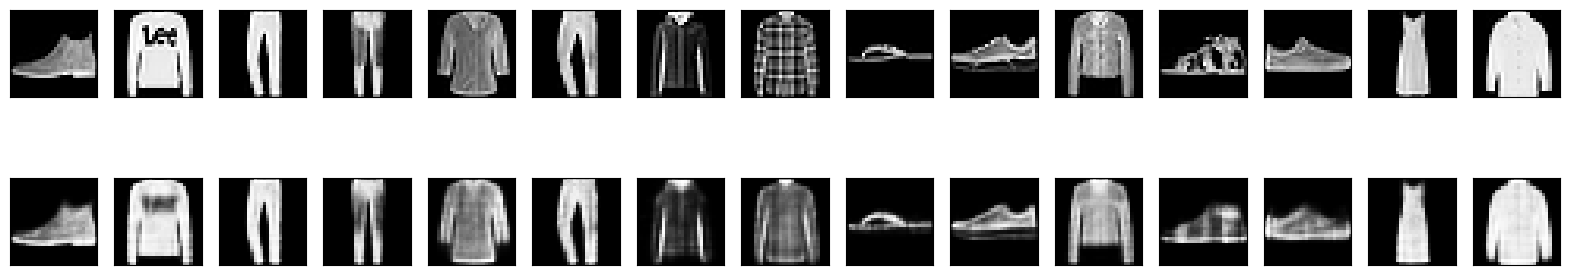

In [5]:
# Visualizando algumas imagens originais sem ruído e reconstruídas
n = 15
plt.figure(figsize=(20, 4))
for i in range(n):
    # Imagem original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Imagem reconstruída
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [6]:
# Codificando e decodificando as imagens de teste com ruído
encoded_imgs = model.predict(x_test_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


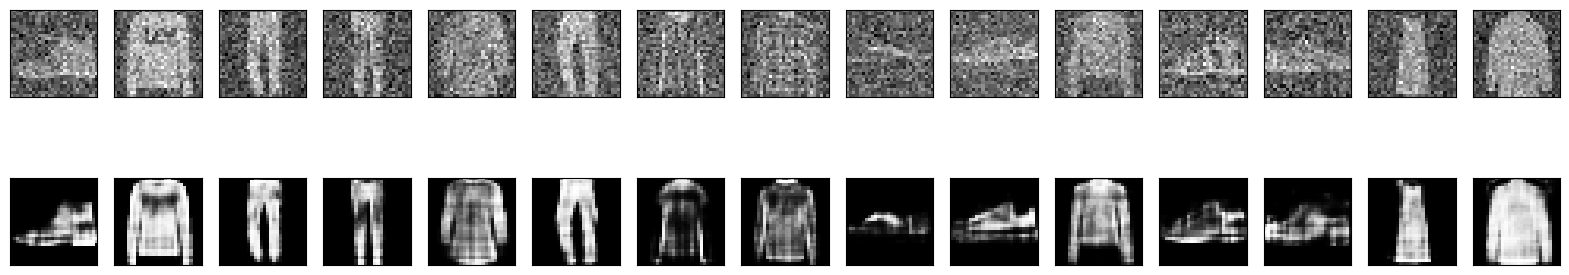

In [7]:
# Visualizando algumas imagens originais com ruído e reconstruídas
n = 15
plt.figure(figsize=(20, 4))
for i in range(n):
    # Imagem original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Imagem reconstruída
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [8]:
batch_size = 128
hidden_units = 256
dropout = 0.45
input_size = x_train.shape[1]
num_labels = len(np.unique(y_train))

# model is a 3-layer MLP with ReLU and dropout after each layer
model2 = Sequential()
model2.add(Dense(hidden_units, input_dim=input_size))
model2.add(Activation('relu'))
#model2.add(Dropout(dropout))
model2.add(Dense(hidden_units))
model2.add(Activation('relu'))
#model2.add(Dropout(dropout))
model2.add(Dense(num_labels))
model2.add(Activation('softmax'))

model2.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [9]:
model2.fit(x_train, y_train, epochs=50, batch_size=batch_size)

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8210 - loss: 0.5016
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8689 - loss: 0.3586
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8812 - loss: 0.3238
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8886 - loss: 0.3033
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8936 - loss: 0.2847
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8999 - loss: 0.2687
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9052 - loss: 0.2544
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9098 - loss: 0.2423
Epoch 9/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9121 - loss: 0.2326
Epoch 10/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9166 - loss: 0.2195
Epoch 11/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9173 - loss: 0.2149
Epoch 12/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [10]:
loss, acc = model2.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTeste de Acurácia Classificação sem Ruído: %.1f%%" % (100.0 * acc))
loss, acc = model2.evaluate(x_test_noisy, y_test, batch_size=batch_size)
print("\nTeste de Acurácia Classificação com Ruído: %.1f%%" % (100.0 * acc))
loss, acc = model2.evaluate(encoded_imgs, y_test, batch_size=batch_size)
print("\nTeste de Acurácia Classificação das Imagens Recuperadas do Ruído: %.1f%%" % (100.0 * acc))

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8927 - loss: 0.6030

Teste de Acurácia Classificação sem Ruído: 89.3%
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7362 - loss: 2.8365

Teste de Acurácia Classificação com Ruído: 73.6%
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7913 - loss: 1.5267

Teste de Acurácia Classificação das Imagens Recuperadas do Ruído: 79.1%
